In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from datetime import datetime

In [2]:
def which_class(data, classes):
    n = len(data)
    m = len(classes)
    result = [0] * n
    
    for i in range(n):
        
        val = data[i]
        
        for j in range(int((m+1)/2)):            
            if classes[j][0] <= val < classes[j][1]:
                result[i] = j
                break

        for j in range(int((m+1)/2), m):
            if classes[j][0] <= val < classes[j][1]:
                result[i] = j
                break
    
    return result

def create_classification_file(historic_data, column_name, deltas):
    
    n_hd = historic_data.shape[0]
    
    for delta in deltas:
        
        data = historic_data[column_name].pct_change(periods = delta).fillna(value = 0).values[delta:]
        
        cen = np.mean(data)
        std = np.std(data)
        
        classes_even6 = [[-100, cen-2*std], 
                        [cen-2*std, cen-1*std], 
                        [cen-1*std, cen], 
                        [cen, cen+1*std], 
                        [cen+1*std, cen+2*std], 
                        [cen+2*std, 100]]
        
        classes_even4 = [[-100, cen-1*std], 
                        [cen-1*std, cen], 
                        [cen, cen+1*std], 
                        [cen+1*std, 100]]
        
        classes_odd3 = [[-100, cen-0.5*std],
                       [cen-0.5*std, cen+0.5*std],
                       [cen+0.5*std, 100]]
        
        '''
        classes_odd = [[-100, cen-2.5*std],
                       [cen-2.5*std, cen-1.5*std],
                       [cen-1.5*std, cen-0.5*std],
                       [cen-0.5*std, cen+0.5*std],
                       [cen+0.5*std, cen+1.5*std],
                       [cen+1.5*std, cen+2.5*std],
                       [cen+2.5*std, 100]]
        '''
        
        new_even6 = which_class(data, classes_even6)
        new_even4 = which_class(data, classes_even4)
        new_odd3 = which_class(data, classes_odd3)
        
        historic_data[str(delta)+'_day_changes'] = list(data) + [np.nan]*(n_hd - len(data))
        historic_data[str(delta)+'_day_even_6class'] = new_even6 + [np.nan]*(n_hd - len(new_even6))
        historic_data[str(delta)+'_day_even_4class'] = new_even4 + [np.nan]*(n_hd - len(new_even4))
        historic_data[str(delta)+'_day_odd_3class'] = new_odd3 + [np.nan]*(n_hd - len(new_odd3))
    
    return historic_data

In [3]:
dis = pd.read_csv("E:\SZAKDOLGOZAT\A_DOLOGZAT\downloads\DIS.csv", index_col = "Date", parse_dates = True)
dis = dis[dis.index >= np.datetime64(datetime(1998, 1, 1))]

f = pd.read_csv("E:\SZAKDOLGOZAT\A_DOLOGZAT\downloads\F.csv", index_col = "Date", parse_dates = True)
f = f[f.index >= np.datetime64(datetime(1998, 1, 1))]

ubs = pd.read_csv("E:\SZAKDOLGOZAT\A_DOLOGZAT\downloads\\UBS.csv", index_col = "Date", parse_dates = True)
ubs = ubs[ubs.index >= np.datetime64(datetime(1998, 1, 1))]

xom = pd.read_csv("E:\SZAKDOLGOZAT\A_DOLOGZAT\downloads\XOM.csv", index_col = "Date", parse_dates = True)
xom = xom[xom.index >= np.datetime64(datetime(1998, 1, 1))]

In [4]:
dis_classification = create_classification_file(dis[['Open']],'Open',[1])
f_classification = create_classification_file(f[['Open']],'Open',[1])
ubs_classification = create_classification_file(ubs[['Open']],'Open',[1])
xom_classification = create_classification_file(xom[['Open']],'Open',[1])

C:\Users\Etele\AppData\Local\Temp/ipykernel_21624/1692517275.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historic_data[str(delta)+'_day_changes'] = list(data) + [np.nan]*(n_hd - len(data))
C:\Users\Etele\AppData\Local\Temp/ipykernel_21624/1692517275.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historic_data[str(delta)+'_day_even_6class'] = new_even6 + [np.nan]*(n_hd - len(new_even6))
C:\Users\Etele\AppData\Local\Temp/ipykernel_21624/1692517275.py:65: SettingWithCopyWarning: 
A value is tryi

In [5]:
dis_classification.to_csv("E:\SZAKDOLGOZAT\KUTATAS\CLASSIFICATION\DIS_fully_classified.csv")
f_classification.to_csv("E:\SZAKDOLGOZAT\KUTATAS\CLASSIFICATION\F_fully_classified.csv")
ubs_classification.to_csv("E:\SZAKDOLGOZAT\KUTATAS\CLASSIFICATION\\UBS_fully_classified.csv")
xom_classification.to_csv("E:\SZAKDOLGOZAT\KUTATAS\CLASSIFICATION\XOM_fully_classified.csv")

[2.3296080591846384,
 8.311034157091191,
 40.075554855972435,
 39.05241618133057,
 7.665669762317073,
 2.5499763891075076]

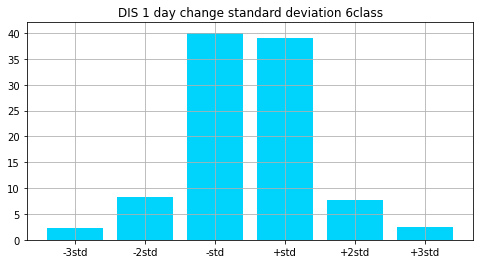

In [6]:
dis_ec = [0.0] * 6
for val in dis_classification['1_day_even_6class'][:-1]:
    dis_ec[int(val)]+=100/dis_classification.shape[0]

fig, ax = plt.subplots(figsize=(8, 4))
plt.grid(visible = True)
plt.title("DIS 1 day change standard deviation 6class")
plt.bar(["-3std", "-2std","-std","+std", "+2std", "+3std" ],dis_ec, color = '#00d4fd')
dis_ec

[10.640642216275742, 40.075554855972435, 39.05241618133057, 10.215646151424506]

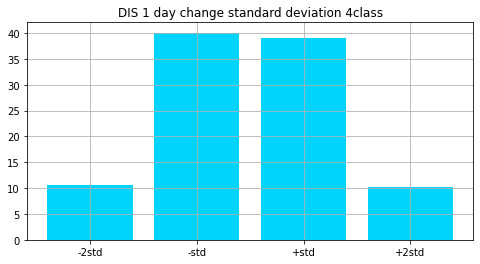

In [7]:
dis_ec = [0.0] * 4
for val in dis_classification['1_day_even_4class'][:-1]:
    dis_ec[int(val)]+=100/dis_classification.shape[0]

fig, ax = plt.subplots(figsize=(8, 4))
plt.grid(visible = True)
plt.title("DIS 1 day change standard deviation 4class")
plt.bar(["-2std","-std","+std", "+2std"],dis_ec, color = '#00d4fd')
dis_ec

[24.03588855658691, 52.069888241773974, 23.87848260664201]

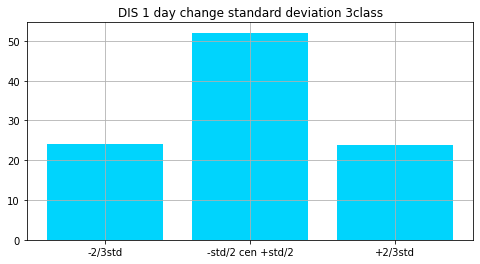

In [8]:
dis_oc = [0.0] * 3
for val in dis_classification['1_day_odd_3class'][:-1]:
    dis_oc[int(val)]+=100/dis_classification.shape[0]

fig, ax = plt.subplots(figsize=(8, 4))
plt.grid(visible = True)
plt.title("DIS 1 day change standard deviation 3class")
plt.bar(["-2/3std","-std/2 cen +std/2", "+2/3std"],dis_oc, color = '#00d4fd')
dis_oc

[1.668503069416026,
 7.146230127498867,
 43.25515504485946,
 38.89501023138567,
 7.004564772548447,
 2.0147961592948254]

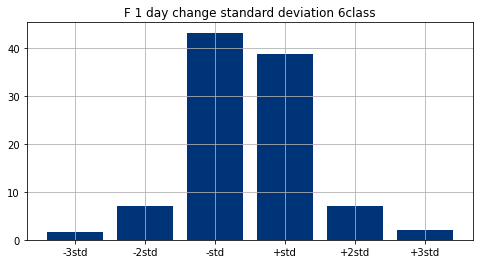

In [9]:
f_ec = [0.0] * 6
for val in f_classification['1_day_even_6class'][:-1]:
    f_ec[int(val)]+=100/f_classification.shape[0]

    
fig, ax = plt.subplots(figsize=(8, 4))
plt.grid(visible = True)
plt.title("F 1 day change standard deviation 6class")
plt.bar(["-3std", "-2std","-std","+std", "+2std", "+3std" ],f_ec, color = '#003478')
f_ec

[8.814733196914878, 43.25515504485946, 38.89501023138567, 9.01936093184325]

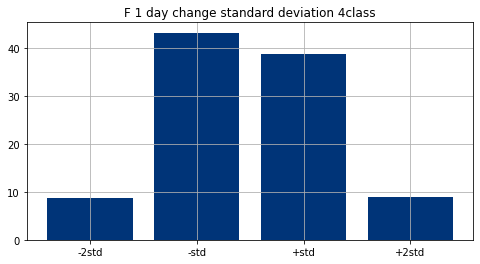

In [18]:
f_ec = [0.0] * 4
for val in f_classification['1_day_even_4class'][:-1]:
    f_ec[int(val)]+=100/f_classification.shape[0]
    
fig, ax = plt.subplots(figsize=(8, 4))
plt.grid(visible = True)
plt.title("F 1 day change standard deviation 4class")
plt.bar(["-2std","-std","+std", "+2std"],f_ec, color = '#003478')
f_ec

[22.39886667715993, 55.80040925546815, 21.78498347237481]

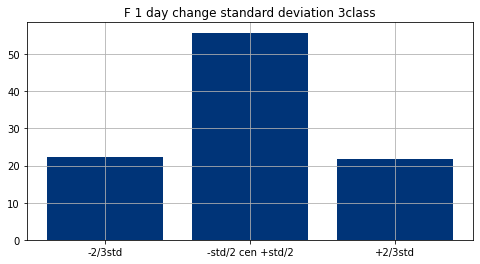

In [11]:
f_oc = [0.0] * 3
for val in f_classification['1_day_odd_3class'][:-1]:
    f_oc[int(val)]+=100/f_classification.shape[0]

fig, ax = plt.subplots(figsize=(8, 4))
plt.grid(visible = True)
plt.title("F 1 day change standard deviation 3class")
plt.bar(["-2/3std","-std/2 cen +std/2", "+2/3std"],f_oc, color = '#003478')
f_oc

[1.841556636553159,
 7.887421820708797,
 47.74148714384972,
 42.929117442668854,
 7.731063238359944,
 2.2237665045170214]

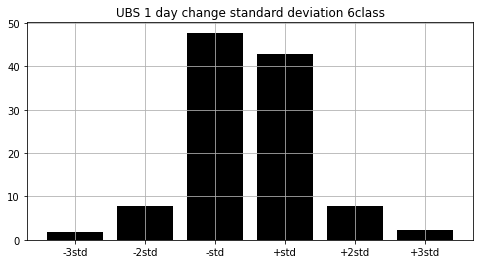

In [12]:
ubs_ec = [0.0] * 6
for val in f_classification['1_day_even_6class'][:-1]:
    ubs_ec[int(val)]+=100/ubs_classification.shape[0]

fig, ax = plt.subplots(figsize=(8, 4))
plt.grid(visible = True)
plt.title("UBS 1 day change standard deviation 6class")
plt.bar(["-3std", "-2std","-std","+std", "+2std", "+3std" ],ubs_ec, color = '#000000')
ubs_ec

[9.850590687977725, 39.54134815844406, 41.40027797081356, 9.190410006949236]

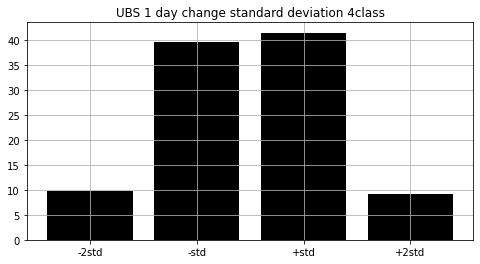

In [13]:
ubs_ec = [0.0] * 4
for val in ubs_classification['1_day_even_4class'][:-1]:
    ubs_ec[int(val)]+=100/ubs_classification.shape[0]

fig, ax = plt.subplots(figsize=(8, 4))
plt.grid(visible = True)
plt.title("UBS 1 day change standard deviation 4class")
plt.bar(["-2std","-std","+std", "+2std"],ubs_ec, color = '#000000')
ubs_ec

[22.619874913134705, 54.603891591381995, 22.758860319667033]

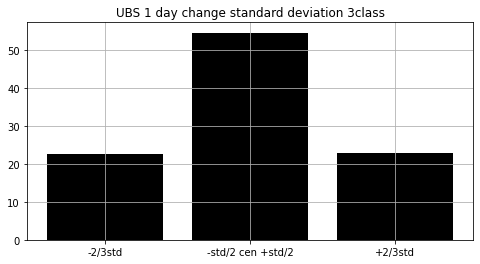

In [14]:
ubs_oc = [0.0] * 3
for val in ubs_classification['1_day_odd_3class'][:-1]:
    ubs_oc[int(val)]+=100/ubs_classification.shape[0]

fig, ax = plt.subplots(figsize=(8, 4))
plt.grid(visible = True)
plt.title("UBS 1 day change standard deviation 3class")
plt.bar(["-2/3std","-std/2 cen +std/2", "+2/3std"],ubs_oc, color = '#000000')
ubs_oc

[2.61293876908547,
 9.349913426727545,
 37.33669132693114,
 39.4931528411763,
 8.830473791909368,
 2.3610892491736197]

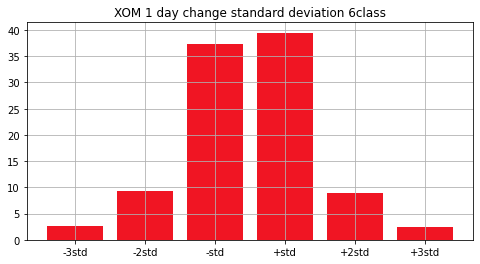

In [15]:
xom_ec = [0.0] * 6
for val in xom_classification['1_day_even_6class'][:-1]:
    xom_ec[int(val)]+=100/xom_classification.shape[0]

fig, ax = plt.subplots(figsize=(8, 4))
plt.grid(visible = True)
plt.title("XOM 1 day change standard deviation 6class")
plt.bar(["-3std", "-2std","-std","+std", "+2std", "+3std" ],xom_ec, color = '#F01523')
xom_ec

[11.96285219581292, 37.33669132693114, 39.4931528411763, 11.1915630410829]

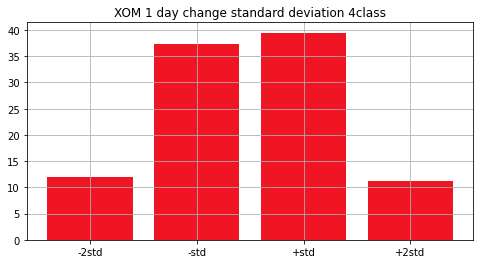

In [16]:
xom_ec = [0.0] * 4
for val in xom_classification['1_day_even_4class'][:-1]:
    xom_ec[int(val)]+=100/xom_classification.shape[0]

fig, ax = plt.subplots(figsize=(8, 4))
plt.grid(visible = True)
plt.title("XOM 1 day change standard deviation 4class")
plt.bar(["-2std","-std","+std", "+2std"],xom_ec, color = '#F01523')
xom_ec

[25.37383913111858, 48.9689910278594, 25.641429246024913]

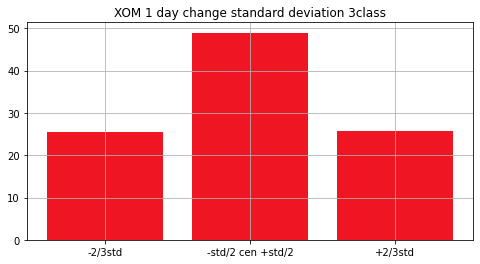

In [17]:
xom_oc = [0.0] * 3
for val in xom_classification['1_day_odd_3class'][:-1]:
    xom_oc[int(val)]+=100/xom_classification.shape[0]

fig, ax = plt.subplots(figsize=(8, 4))
plt.grid(visible = True)
plt.title("XOM 1 day change standard deviation 3class")
plt.bar(["-2/3std","-std/2 cen +std/2", "+2/3std"], xom_oc, color = '#F01523')
xom_oc